In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
# DO NOT EDIT THIS BLOCK.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

In [ ]:
# Here we set up some datasets for evaluation purposes, do not edit this code or edit these blocks. 

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


## 1.  
For each of the first 5 training examples, print the text of the message along with the label.

In [ ]:
### START ###

Throughout the given tasks, I will make extensive use of new cells to clearly go over my thought processes and neatly elucidate necessary steps. For the purposes of pedagogy, the variables are being dynamically redefined. If needed, please recompile the code from top-to-bottom.

# Corpus Exploration
Step objective: Get to know the data sets. 

Both train and test data sets have the same structure, obviously. Moreover, the newgroups test data set have been divided into two parts: test and dev data set.

In [ ]:
print("Keys of dataset: \n{}".format(newsgroups_train.keys()))
print("Keys of dataset: \n{}".format(newsgroups_test.keys()))
print(len(newsgroups_test.target))

Keys of dataset: 
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
Keys of dataset: 
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
1353


Let's get to know briefly what our data set is all about:

In [ ]:
print(newsgroups_train['DESCR'][:300] + "\n...")

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
be
...


We are dealing with newsgroups on different topics with given test-train data division. This gives us some idea or overview that the tasks ahead are of the supervised classification nature. What do we need to classify (data) and what are the classifications (target)? An example post would look like the following:

In [ ]:
print(newsgroups_train['data'][0] + "\n...")

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
...


where we are tasked to classify this from the following target names:

In [ ]:
print("Target names: {}".format(newsgroups_train['target_names']))

Target names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


By eyeballing, we can see that this must be classified in the domain of comp.graphics. Hence, we are tasked to derive ML models to automate these for any arbitrary posts. This gives us the data that we will be dealing with NLP methods. Well, of course we already have classifications for our training data set. This is neatly encoded into the target data:

In [ ]:
print('Target:\n{}'.format(newsgroups_train['target'][:50])) # first 50 target data

# Observe that our eyeballing of the article being a comp.graphics classification (index [1]) is validated.

Target:
[1 3 2 0 2 0 2 1 2 1 2 1 1 2 1 2 0 2 2 3 2 1 3 3 1 1 2 1 2 3 0 3 1 1 0 2 0
 1 0 2 0 2 0 1 1 0 0 3 3 3]


Let us culminate our brief exploration by executing the required task. We are tasked to instantiate the first five articles together with their labels. To avoid clutter, we will be executing this into seperate cells.

### Article 1

In [ ]:
print("Article #1. Label: {}".format(newsgroups_train['target_names'][newsgroups_train['target'][0]]) 
      + "\n" + newsgroups_train['data'][0] + "\n...")

Article #1. Label: comp.graphics
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
...


### Article 2

In [ ]:
print("Article #2. Label: {}".format(newsgroups_train['target_names'][newsgroups_train['target'][1]])
          + "\n" + newsgroups_train['data'][1] + "\n...")

Article #2. Label: talk.religion.misc


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.
...


### Article 3

In [ ]:
print("Article #3. Label: {}".format(newsgroups_train['target_names'][newsgroups_train['target'][2]])
         + "\n" + newsgroups_train['data'][2] + "\n...")

Article #3. Label: sci.space

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) 

MB>                                                             So the
MB> 1970 figure seems unlikely to actually be anything but a perijove.

JG>Sorry, _perijoves_...I'm not used to talking this language.

Couldn't we just say periapsis or apoapsis?

 
...


### Article 4

In [ ]:
print("Article #4. Label: {}".format(newsgroups_train['target_names'][newsgroups_train['target'][3]])
         + "\n" + newsgroups_train['data'][3] + "\n...")

Article #4. Label: alt.atheism
I have a request for those who would like to see Charley Wingate
respond to the "Charley Challenges" (and judging from my e-mail, there
appear to be quite a few of you.)  

It is clear that Mr. Wingate intends to continue to post tangential or
unrelated articles while ingoring the Challenges themselves.  Between
the last two re-postings of the Challenges, I noted perhaps a dozen or
more posts by Mr. Wingate, none of which answered a single Challenge.  

It seems unmistakable to me that Mr. Wingate hopes that the questions
will just go away, and he is doing his level best to change the
subject.  Given that this seems a rather common net.theist tactic, I
would like to suggest that we impress upon him our desire for answers,
in the following manner:

1. Ignore any future articles by Mr. Wingate that do not address the
Challenges, until he answers them or explictly announces that he
refuses to do so.

--or--

2. If you must respond to one of his articles, inc

### Article 5

In [ ]:
print("Article #5. Label: {}".format(newsgroups_train['target_names'][newsgroups_train['target'][4]])
          + "\n"+ newsgroups_train['data'][4] + "\n...")

Article #5. Label: sci.space
AW&ST  had a brief blurb on a Manned Lunar Exploration confernce
May 7th  at Crystal City Virginia, under the auspices of AIAA.

Does anyone know more about this?  How much, to attend????

Anyone want to go?
...


Cool. Now, we know what our data set looks like. Our next tasks would be to transform these into something workable with via vectorizations.

In [ ]:
### END ###

## 2.

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>



# Vectorization
Step objective: Apply NLP basic methods of tokenization, vocabulary building, and encoding.

In [ ]:
### START ###

Now, what we shall do is to transform the training data into feature vectors. The simplest transformation is a simple unigram tokenization. Typically, we start by dividing data sets into training and testing data first by 75-25 rule of thumb. However, we are already given such divisions. We can directly tokenize via CountVectorizer method. We can represent the corpus as an m x n matrix of word frequencies.

In [ ]:
X_train = CountVectorizer().fit_transform(train_data)
y_train = train_labels
array_rep = X_train.toarray()
print("Matrix representation of corpus:\n{}".format(
 array_rep[:5]))
print("Vocabulary size: {}".format(X_train.shape))
matrix_size = X_train.shape[0] * X_train.shape[1]
print("Total matrix size: {}".format(matrix_size))

Matrix representation of corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary size: (2034, 26879)
Total matrix size: 54671886


Observe that the matrix representation is enormous with total placeholders of 54,671,885 - almost 55 million. However, the vocabulary size is composed only of 26,879 features. Hence, most of the matrix entries would be zeros as observed from the above sample representation. To find the average number of non-zero entries, we can use the nnz method as follows:

In [ ]:
average = X_train.nnz/X_train.shape[0]
print(average)

96.70599803343165


Hence, on average, there are about 97 unique words per entry. To find the fraction of non-zero entries, we can use the nnz method as follows:

In [ ]:
non_zero_entries = X_train.nnz
print("Fraction of nonzero entries: {}".format(non_zero_entries/(matrix_size)))
print("Percentage of nonzero entries: {}".format(100*(non_zero_entries/(matrix_size))) + " %")

Fraction of nonzero entries: 0.0035978272269590263
Percentage of nonzero entries: 0.3597827226959026 %


Only a measely 0.35 % are nonzero entries of the corpus matrix. Finally, we can directly alphabetically arrange features via the following

In [ ]:
feature_names = CountVectorizer().fit(train_data).get_feature_names()
print("Number of features: {}".format(X_train.shape[1]))
print("First feature: {}".format(feature_names[0]))
print("Last feature: {}".format(feature_names[-1]))

Number of features: 26879
First feature: 00
Last feature: zyxel


In this alphanumeric arrangement, we are expecting the zero number first and the z letter last which makes sense here. We can construct similar vectorization with character bigrams and trigrams as follows:

In [ ]:
X_train = CountVectorizer(ngram_range=(2, 2), analyzer='char').fit_transform(train_data)
y_train = train_labels
array_rep = X_train.toarray()
print("Matrix representation of corpus:\n{}".format(
 array_rep[:5]))
print("Vocabulary size: {}".format(X_train.shape))
matrix_size = X_train.shape[0] * X_train.shape[1]
print("Total matrix size: {}".format(matrix_size))

feature_names = CountVectorizer(ngram_range=(2, 2), analyzer='char').fit(train_data).get_feature_names()
print("Number of features: {}".format(X_train.shape[1]))
print("First feature: {}".format(feature_names[0]))
print("Last feature: {}".format(feature_names[-1]))

first_feat = feature_names[0]
print(first_feat[0])

Matrix representation of corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary size: (2034, 3291)
Total matrix size: 6693894
Number of features: 3291
First feature:i
Last feature: þ 



In [ ]:
X_train = CountVectorizer(ngram_range=(3, 3), analyzer='char').fit_transform(train_data)
y_train = train_labels
array_rep = X_train.toarray()
print("Matrix representation of corpus:\n{}".format(
 array_rep[:5]))
print("Vocabulary size: {}".format(X_train.shape))
matrix_size = X_train.shape[0] * X_train.shape[1]
print("Total matrix size: {}".format(matrix_size))

feature_names = CountVectorizer(ngram_range=(3, 3), analyzer='char').fit(train_data).get_feature_names()
print("Number of features: {}".format(X_train.shape[1]))
print("First feature: {}".format(feature_names[0]))
print("Last feature: {}".format(feature_names[-1]))

last_feat = feature_names[-1]
print(last_feat[1])

Matrix representation of corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary size: (2034, 32187)
Total matrix size: 65468358
Number of features: 32187
First feature:ib
Last feature: þ h
 


Pruning can be directly done via min_df:

In [ ]:
X_train = CountVectorizer(min_df = 10).fit_transform(train_data)
y_train = train_labels
array_rep = X_train.toarray()
print("Matrix representation of corpus:\n{}".format(
 array_rep[:5]))
print("Vocabulary size: {}".format(X_train.shape))
matrix_size = X_train.shape[0] * X_train.shape[1]
print("Total matrix size: {}".format(matrix_size))

feature_names = CountVectorizer(min_df = 10).fit(train_data).get_feature_names()
print("Number of features: {}".format(X_train.shape[1]))
print("First feature: {}".format(feature_names[0]))
print("Last feature: {}".format(feature_names[-1]))


Matrix representation of corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary size: (2034, 3064)
Total matrix size: 6232176
Number of features: 3064
First feature: 00
Last feature: zip


Compare this with the original 26879 features and 54,671,886, 

In [ ]:
feature_ratio = 26879 / 3064
matrix_ratio = 54671886 / 6232176

print("The feature was reduced by: {}".format(feature_ratio) + " times")
print("The matrix elements were reduced by: {}".format(matrix_ratio) + " times")


The feature was reduced by: 8.772519582245431 times
The matrix elements were reduced by: 8.772519582245431 times


The equality is to be expected since dimensionality reduction was only done on the feature dimension and not on the samples dimension. Now, we can code a side-by-side comparison of train_data and dev_data vectorization.

In [ ]:
X_train = CountVectorizer().fit_transform(train_data)
y_train = train_labels
array_rep = X_train.toarray()
print("Matrix representation of corpus:\n{}".format(
 array_rep[:5]))
print("Vocabulary size: {}".format(X_train.shape))
matrix_size = X_train.shape[0] * X_train.shape[1]
print("Total matrix size: {}".format(matrix_size))

feature_names = CountVectorizer().fit(train_data).get_feature_names()
print("Number of features: {}".format(X_train.shape[1]))
print("First feature: {}".format(feature_names[0]))
print("Last feature: {}".format(feature_names[-1]))

X_dev = CountVectorizer().fit_transform(dev_data)
y_dev = dev_labels
array_rep = X_dev.toarray()
print("Matrix representation of corpus:\n{}".format(
 array_rep[:5]))
print("Vocabulary size: {}".format(X_dev.shape))
matrix_size = X_dev.shape[0] * X_dev.shape[1]
print("Total matrix size: {}".format(matrix_size))

feature_names = CountVectorizer().fit(dev_data).get_feature_names()
print("Number of features: {}".format(X_dev.shape[1]))
print("First feature: {}".format(feature_names[0]))
print("Last feature: {}".format(feature_names[-1]))

Matrix representation of corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary size: (2034, 26879)
Total matrix size: 54671886
Number of features: 26879
First feature: 00
Last feature: zyxel
Matrix representation of corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Vocabulary size: (676, 16246)
Total matrix size: 10982296
Number of features: 16246
First feature: 00
Last feature: zyxel


Observe that most features are identical except for the total number of features. That is, the missing fraction expressed by

$$
\text{missing fraction} = 1-\frac{\text{dev features}}{\text{train features}}
$$

In [ ]:
missing_frac = 1-(X_dev.shape[1]/X_train.shape[1])
print(missing_frac)

0.395587633468507


That is, the dev features are approximately 40% smaller than train features.

## 3.

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

# Supervised model building
Step objective: Construct k-NN, logistic regression, and naive Bayes model. Assess the models accordingly.

In [ ]:
### START ###
from sklearn.metrics import f1_score

### k-NN model

We start with the simplest (yet most inaccurate in this case) model of k-nearest neighbors. Basically, this is a simple algorithm which classifies a data point via the most frequent neighbors. We can directly both transform and fit training data via fit_transform.

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(train_data)
y_train = train_labels

X_dev = vect.transform(dev_data)
y_dev = dev_labels

X_test = vect.transform(test_data)
y_test = test_labels

After vectorization, we can directly employ the modelling algorithm. Our first task is to calibrate the model by finding appropriate calibration parameter using our dev data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

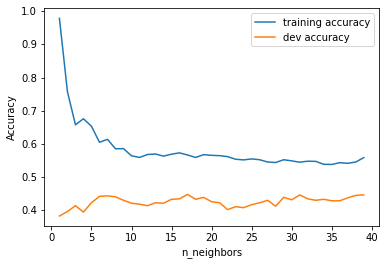

In [ ]:
# raw score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
neighbors_settings = range(1, 40)
for n_neighbors in neighbors_settings:
 # build the model
    clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_knn.fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf_knn.score(X_train, y_train))
 # record generalization accuracy
    #test_accuracy.append(clf_knn.score(X_test, y_test))
 # record dev accuracy
    dev_accuracy.append(clf_knn.score(X_dev, y_dev))   
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, dev_accuracy, label="dev accuracy")
#plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

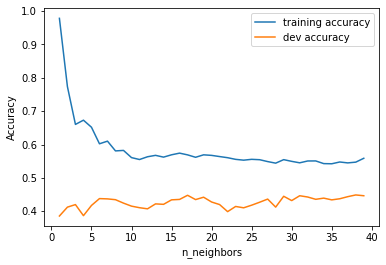

In [ ]:
# f1 score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
neighbors_settings = range(1, 40)
for n_neighbors in neighbors_settings:
 # build the model
    clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_knn.fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(f1_score(clf_knn.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    #test_accuracy.append(f1_score(clf_knn.predict(X_test), y_test, average="weighted"))
 # record dev accuracy
    dev_accuracy.append(f1_score(clf_knn.predict(X_dev), y_dev, average="weighted"))   
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, dev_accuracy, label="dev accuracy")
#plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Observe that overfitting trend starts at 5 neighbors and below while there exists a local optima at 6 neighbors. For this particular model, the best we can do is

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=6)
clf_knn.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(clf_knn.score(X_train, y_train)))
print("Dev set accuracy: {:.2f}".format(clf_knn.score(X_dev, y_dev)))

Train set accuracy: 0.61
Dev set accuracy: 0.44


We shall use this k = 6 for our test data set.

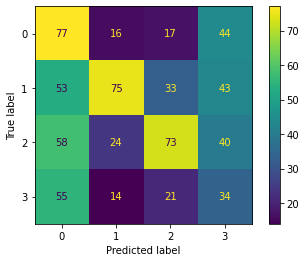

f1 score is: 0.373
Train set accuracy: 0.605
Test set accuracy: 0.383


In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=6)
clf_knn.fit(X_train, y_train)
plot_confusion_matrix(clf_knn, X_test, y_test)  
plt.show()
f1_knn=f1_score(clf_knn.predict(X_test), y_test, average="weighted")
print("f1 score is: {:.3f}".format(f1_knn))
print("Train set accuracy: {:.3f}".format(clf_knn.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf_knn.score(X_test, y_test)))

Observe that one way to observe that k-NN does not work particularly well in this example is that the highest square value in the confusion matrix does not even lie in the diagonal. This means that our model the majority of our model predicts erroneously. This is a very poor model. This is to be expected since k-NN does not work well with datasets with large features and sparse data sets (which should be expected in NLP applications).

### Logistic regression model

Now, we proceed to the next modelling algorithm. Using logistic regression,

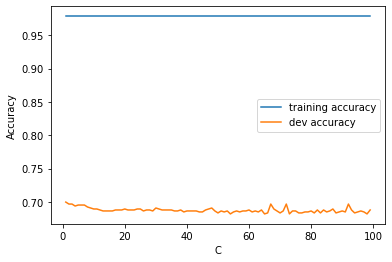

In [ ]:
# raw score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
C_settings = range(1, 100)
for set_C in C_settings:
 # build the model
    clf_lgr = LogisticRegression(C=set_C,max_iter=100000,solver="liblinear", multi_class="auto").fit(
        X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf_lgr.score(X_train, y_train))
 # record generalization accuracy
    #test_accuracy.append(clf_lgr.score(X_test, y_test))
 # record dev accuracy
    dev_accuracy.append(clf_lgr.score(X_dev, y_dev))   
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, dev_accuracy, label="dev accuracy")
#plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()


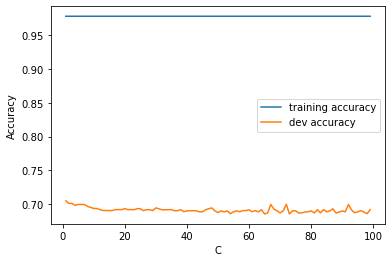

In [ ]:
# f1 score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
C_settings = range(1, 100)
for set_C in C_settings:
 # build the model
    clf_lgr = LogisticRegression(C=set_C,max_iter=100000,solver="liblinear", multi_class="auto").fit(
        X_train, y_train)
 # record training set accuracy
    training_accuracy.append(f1_score(clf_lgr.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    #test_accuracy.append(f1_score(clf_lgr.predict(X_test), y_test, average="weighted"))
 # record dev accuracy
    dev_accuracy.append(f1_score(clf_lgr.predict(X_dev), y_dev, average="weighted"))   
plt.plot(C_settings, training_accuracy, label="training accuracy")
plt.plot(C_settings, dev_accuracy, label="dev accuracy")
#plt.plot(C_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

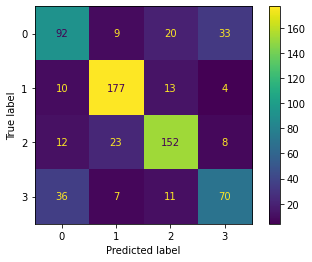

f1 score is: 0.728
Train set accuracy: 0.978
Test set accuracy: 0.725
Sum of squared weights for alt.atheism: 1402.519330386409
Sum of squared weights for comp.graphics: 1097.9011714098913
Sum of squared weights for sci.space: 1297.89651371215
Sum of squared weights for talk.religion.misc: 1307.1063208241344


In [ ]:
clf_lgr = LogisticRegression(C=100,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)

plot_confusion_matrix(clf_lgr, X_test, y_test)  
plt.show()
f1_lgr=f1_score(clf_lgr.predict(X_test), y_test, average="weighted")
print("f1 score is: {:.3f}".format(f1_lgr))
print("Train set accuracy: {:.3f}".format(clf_lgr.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf_lgr.score(X_test, y_test)))


weight_lgr = clf_lgr.coef_

squared_sum_list = []
for k in range(0, 4):
    squared_sum = sum(i**2 for i in weight_lgr[k])
    squared_sum_list.append(squared_sum)

print("Sum of squared weights for alt.atheism: " + str(squared_sum_list[0]))
print("Sum of squared weights for comp.graphics: " + str(squared_sum_list[1]))
print("Sum of squared weights for sci.space: " + str(squared_sum_list[2]))
print("Sum of squared weights for talk.religion.misc: " + str(squared_sum_list[3]))


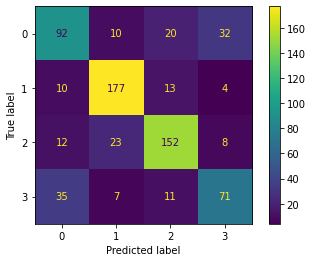

f1 score is: 0.729
Train set accuracy: 0.978
Test set accuracy: 0.727
Sum of squared weights for alt.atheism: 1602.0909210972602
Sum of squared weights for comp.graphics: 1239.738127051838
Sum of squared weights for sci.space: 1481.955264732198
Sum of squared weights for talk.religion.misc: 1496.115953965751


In [ ]:
clf_lgr = LogisticRegression(C=150,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)

plot_confusion_matrix(clf_lgr, X_test, y_test)  
plt.show()
f1_lgr=f1_score(clf_lgr.predict(X_test), y_test, average="weighted")
print("f1 score is: {:.3f}".format(f1_lgr))
print("Train set accuracy: {:.3f}".format(clf_lgr.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf_lgr.score(X_test, y_test)))


weight_lgr = clf_lgr.coef_

squared_sum_list = []
for k in range(0, 4):
    squared_sum = sum(i**2 for i in weight_lgr[k])
    squared_sum_list.append(squared_sum)

print("Sum of squared weights for alt.atheism: " + str(squared_sum_list[0]))
print("Sum of squared weights for comp.graphics: " + str(squared_sum_list[1]))
print("Sum of squared weights for sci.space: " + str(squared_sum_list[2]))
print("Sum of squared weights for talk.religion.misc: " + str(squared_sum_list[3]))


Increasing C value directly increases the sum of squared weights for each topic.

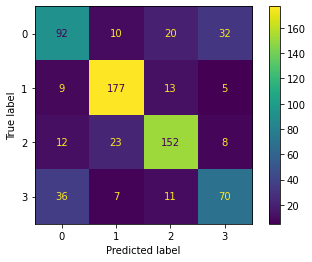

f1 score is: 0.728
Train set accuracy: 0.978
Test set accuracy: 0.725
Sum of squared weights for alt.atheism: 1109.258394068409
Sum of squared weights for comp.graphics: 858.5932795274824
Sum of squared weights for sci.space: 1021.5315573472394
Sum of squared weights for talk.religion.misc: 1034.2176736444549


In [ ]:
clf_lgr = LogisticRegression(C=50,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)

plot_confusion_matrix(clf_lgr, X_test, y_test)  
plt.show()
f1_lgr=f1_score(clf_lgr.predict(X_test), y_test, average="weighted")
print("f1 score is: {:.3f}".format(f1_lgr))
print("Train set accuracy: {:.3f}".format(clf_lgr.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf_lgr.score(X_test, y_test)))


weight_lgr = clf_lgr.coef_

squared_sum_list = []
for k in range(0, 4):
    squared_sum = sum(i**2 for i in weight_lgr[k])
    squared_sum_list.append(squared_sum)

print("Sum of squared weights for alt.atheism: " + str(squared_sum_list[0]))
print("Sum of squared weights for comp.graphics: " + str(squared_sum_list[1]))
print("Sum of squared weights for sci.space: " + str(squared_sum_list[2]))
print("Sum of squared weights for talk.religion.misc: " + str(squared_sum_list[3]))


Meanwhile, decreasing C value directly decreases the sum of squared weights for each topic. Using the logistic regression model now forced the majority into the diagonal and there exists far less erroneous prediction outside the diagonal. This is a huge jump from the poor k-NN model. Logistic regression models handle large and sparse data quite efficiently. However, for more efficiency, Naive Bayes models fit the job more with its feature-independence assumption.

### Naive Bayes model

Qualitatively, the confusion matrix of the multinomial naive Bayes model looks similar to the logistic regression model. However, the subtlety lies in a slight increase of diagonal values and a slight decrease in the off-diagonal values.

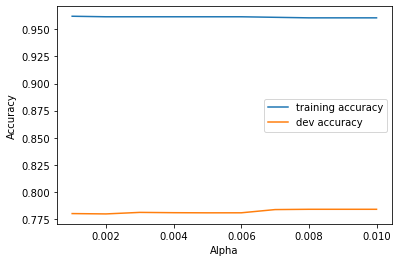

In [ ]:
# f1 score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
alpha_settings = np.linspace(0.001,0.01,10)
for set_alpha in alpha_settings:
 # build the model
    clf_mnb = MultinomialNB(alpha=set_alpha).fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(f1_score(clf_mnb.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    test_accuracy.append(f1_score(clf_mnb.predict(X_test), y_test, average="weighted"))
 # record dev accuracy
    dev_accuracy.append(f1_score(clf_mnb.predict(X_dev), y_dev, average="weighted"))   
plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, dev_accuracy, label="dev accuracy")
#plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.legend()


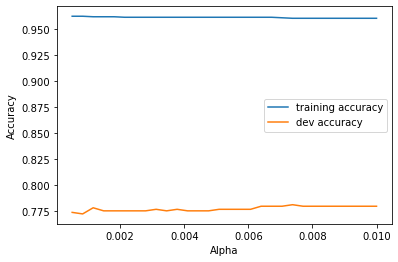

In [ ]:
# raw score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
alpha_settings = np.linspace(0.0005,0.01,30)
for set_alpha in alpha_settings:
 # build the model
    clf_mnb = MultinomialNB(alpha=set_alpha).fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf_mnb.score(X_train, y_train))
 # record generalization accuracy
    test_accuracy.append(clf_mnb.score(X_test, y_test))
 # record dev accuracy
    dev_accuracy.append(clf_mnb.score(X_dev, y_dev))   
plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, dev_accuracy, label="dev accuracy")
#plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.legend()

Upon calibration, there is an apparent local maximum at alpha = 0.001.

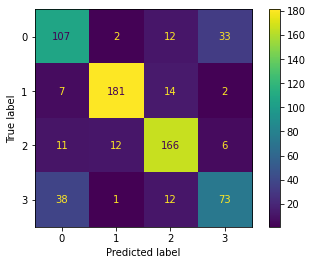

f1 score is: 0.779
Train set accuracy: 0.962
Test set accuracy: 0.778


In [ ]:
clf_mnb = MultinomialNB(alpha=0.001).fit(X_train, y_train)
plot_confusion_matrix(clf_mnb, X_test, y_test)  
plt.show()
f1_mnb=f1_score(clf_mnb.predict(X_test), y_test, average="weighted")
print("f1 score is: {:.3f}".format(f1_mnb))
print("Train set accuracy: {:.3f}".format(clf_mnb.score(X_train, y_train)))
#print("Dev set accuracy: {:.3f}".format(clf_mnb.score(X_dev, y_dev)))
print("Test set accuracy: {:.3f}".format(clf_mnb.score(X_test, y_test)))

For Bernoulli naive Bayes model,

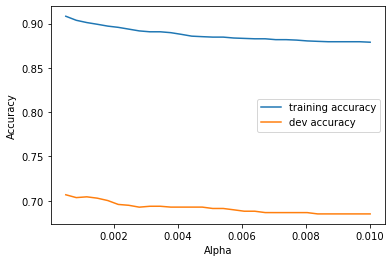

In [ ]:
# f1 score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
alpha_settings = np.linspace(0.0005,0.01,30)
for set_alpha in alpha_settings:
 # build the model
    clf_bnb = BernoulliNB(alpha=set_alpha).fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(f1_score(clf_bnb.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    test_accuracy.append(f1_score(clf_bnb.predict(X_test), y_test, average="weighted"))
 # record dev accuracy
    dev_accuracy.append(f1_score(clf_bnb.predict(X_dev), y_dev, average="weighted"))   
plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, dev_accuracy, label="dev accuracy")
#plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.legend()

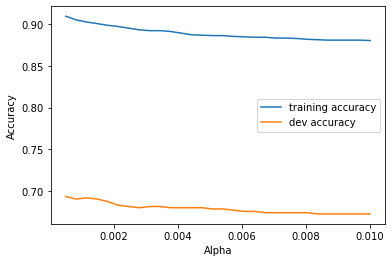

In [ ]:
# raw score

training_accuracy = []
test_accuracy = []
dev_accuracy = []
alpha_settings = np.linspace(0.0005,0.01,30)
for set_alpha in alpha_settings:
 # build the model
    clf_bnb = BernoulliNB(alpha=set_alpha).fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf_bnb.score(X_train, y_train))
 # record generalization accuracy
    test_accuracy.append(clf_bnb.score(X_test, y_test))
 # record dev accuracy
    dev_accuracy.append(clf_bnb.score(X_dev, y_dev))   
plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, dev_accuracy, label="dev accuracy")
#plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.legend()

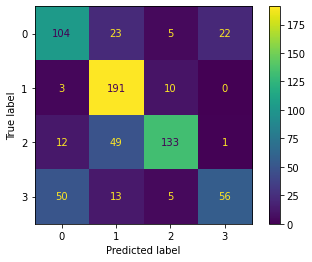

f1 score is: 0.722
Train set accuracy: 0.903
Dev set accuracy: 0.694
Test set accuracy: 0.715


In [ ]:
clf_bnb = BernoulliNB(alpha=0.001).fit(X_train, y_train)

plot_confusion_matrix(clf_bnb, X_test, y_test)  
plt.show()
f1_bnb=f1_score(clf_bnb.predict(X_test), y_test, average="weighted")
print("f1 score is: {:.3f}".format(f1_bnb))
print("Train set accuracy: {:.3f}".format(clf_bnb.score(X_train, y_train)))
print("Dev set accuracy: {:.3f}".format(clf_bnb.score(X_dev, y_dev)))
print("Test set accuracy: {:.3f}".format(clf_bnb.score(X_test, y_test)))

Using a Bernoulli naive Bayes model decreased the perfomance from the more efficient Multinomial naive Bayes evident from the decrease of the diagonal values and a general increase in off-diagonal values. Observe that for the same value of alpha, Multinomial NB has better performance than Bernoulli NB algorithm. This is because we are dealing with a relatively large number of features.

In [ ]:
### END ###

### 4.

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 110.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`? What is the f1 score?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Hint/Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [ ]:
### START ###

I apologize for the redundancy of using both raw score and f1 ratio in our previous analysis. Of course, we know that f1 score offers a more robust method of assessing our algorithms. From here, we use the f1 score.

Training set score: 0.978
Test set score: 0.728


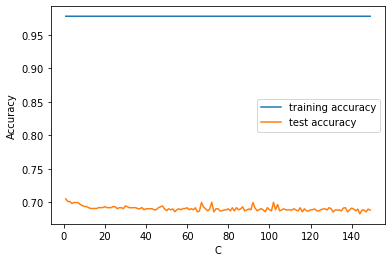

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = CountVectorizer().fit_transform(train_data)
y_train = train_labels

clf_lgr = LogisticRegression(C=110,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)
print("Training set score: {:.3f}".format(f1_score(clf_lgr.predict(X_train), y_train, average="weighted")))
print("Test set score: {:.3f}".format(f1_score(clf_lgr.predict(X_test), y_test, average="weighted")))

count_training_accuracy = []
count_test_accuracy = []
count_dev_accuracy = []
C_settings = range(1, 150)
for set_C in C_settings:
 # build the model
    clf_lgr = LogisticRegression(C=set_C,max_iter=100000,solver="liblinear", multi_class="auto").fit(
        X_train, y_train)
 # record training set accuracy
    count_training_accuracy.append(f1_score(clf_lgr.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    count_test_accuracy.append(f1_score(clf_lgr.predict(X_dev), y_dev, average="weighted"))
 # record dev accuracy
    #count_dev_accuracy.append(clf_lgr.score(X_dev, y_dev))   
plt.plot(C_settings, count_training_accuracy, label="training accuracy")
#plt.plot(C_settings, count_dev_accuracy, label="dev accuracy")
plt.plot(C_settings, count_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

Training set score: 0.978
Test set score: 0.746


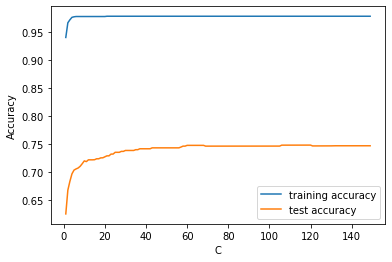

In [ ]:
X_train = TfidfVectorizer().fit_transform(train_data)
y_train = train_labels

clf_lgr = LogisticRegression(C=110,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf_lgr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf_lgr.score(X_test, y_test)))

tfidf_training_accuracy = []
tfidf_test_accuracy = []
tfidf_dev_accuracy = []
C_settings = range(1, 150)
for set_C in C_settings:
 # build the model
    clf_lgr = LogisticRegression(C=set_C,max_iter=100000,solver="liblinear", multi_class="auto").fit(
        X_train, y_train)
 # record training set accuracy
    tfidf_training_accuracy.append(f1_score(clf_lgr.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    tfidf_test_accuracy.append(f1_score(clf_lgr.predict(X_test), y_test, average="weighted"))
 # record dev accuracy
    #tfidf_dev_accuracy.append(f1_score(clf_lgr.predict(X_dev), y_dev, average="weighted"))   
plt.plot(C_settings, tfidf_training_accuracy, label="training accuracy")
#plt.plot(C_settings, tfidf_dev_accuracy, label="dev accuracy")
plt.plot(C_settings, tfidf_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

This explains why the task required us to us C = 110. Observe the bump between 100th and 120th tick marks. Now, we compared the improvements made by Tfidf vectorization via their difference.

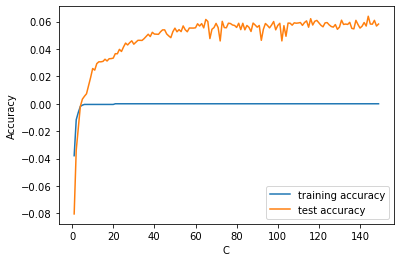

In [ ]:
train_difference = []
zip_object = zip(tfidf_training_accuracy, count_training_accuracy)
for tfidf_training_accuracy_i, count_training_accuracy_i in zip_object:
    train_difference.append(tfidf_training_accuracy_i-count_training_accuracy_i)

dev_difference = []
zip_object = zip(tfidf_dev_accuracy, count_dev_accuracy)
for tfidf_dev_accuracy_i, count_dev_accuracy_i in zip_object:
    dev_difference.append(tfidf_dev_accuracy_i-count_dev_accuracy_i)

test_difference = []
zip_object = zip(tfidf_test_accuracy, count_test_accuracy)
for tfidf_test_accuracy_i, count_test_accuracy_i in zip_object:
    test_difference.append(tfidf_test_accuracy_i-count_test_accuracy_i)


plt.plot(C_settings, train_difference, label="training accuracy")
#plt.plot(C_settings, dev_difference, label="dev accuracy")
plt.plot(C_settings, test_difference, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()


Observe that for lower values of L2 regularization, CountVectorizer outperforms TfidfVectorizer. At about C = 10 an onwards, TfidVectorizer always outperforms CounterVectorizer reaching at an asymptotic but non-monotonous point at C = 60.

In [ ]:
X_train = TfidfVectorizer().fit_transform(train_data)
y_train = train_labels

clf_lgr = LogisticRegression(C=110,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)
pred_proba = clf_lgr.predict_proba(X_test)


#print("Argmax of predicted probabilities:\n{}".format(
 #np.argmax(clf_lgr.predict_proba(X_test)[:50], axis=1)))

print("Predictions:\n{}".format(clf_lgr.predict(X_test)[:50]))

#print("Predicted probabilities:\n{}".format(pred_proba[:6]))

max_proba = np.max(clf_lgr.predict_proba(X_test), axis = 1)
#print(max_proba[:10])


actual_predicted_proba = []
for i in range(0, len(pred_proba)):
    actual_predicted_proba.append(pred_proba[i][y_test[i]])
#print(actual_predicted_proba[:10])

counter = 0
for i in range(0, len(pred_proba)):
    if actual_predicted_proba[i] == max_proba[i]:
        counter += 1
        
        
r_ratio = np.divide(max_proba, actual_predicted_proba)
print("Equality counter: " + str(counter))
print(clf_lgr.score(X_test,y_test))

# show that sums across rows are one
# print("Sums: {}".format(clf_lgr.predict_proba(X_test)[:6].sum(axis=1)))


import heapq

top_three = heapq.nlargest(3, range(len(r_ratio)), r_ratio.__getitem__)
print("Top three r ratio: " + str(sorted(top_three, reverse = True))) # This gives us non-infinite r_ratio values
average_r_ratio = sum(r_ratio) / len(r_ratio)
print("Average r ratio: " + str(average_r_ratio))

Predictions:
[3 1 1 1 2 3 0 2 1 2 1 0 3 1 2 1 0 2 1 3 1 0 3 2 3 0 2 2 0 0 1 0 0 2 1 1 3
 0 1 2 2 1 3 0 3 0 1 2 2 1]
Equality counter: 505
0.7459379615952733
Top three r ratio: [589, 573, 111]
Average r ratio: inf


<ipython-input-49-0653ef621b55>:30: RuntimeWarning: divide by zero encountered in true_divide
  r_ratio = np.divide(max_proba, actual_predicted_proba)


R ratio is a parameter relating our model's certainty of picking a particular feature per document and the actual probability it predicts.As you can see, the downside of using a Tfidf vectorizer is too much rescaling such that the makes the predictions "more certain" or "more calibrated" when it should be not. This tilts the scale such that some features gives us way too low of a certainty and calculating r ratio could not be precisely made due to machine precision limitations; some explodes due to division by zero. Using CounterVectorizer, we avoid this issue at the cost of some loss on f1 score.

In [ ]:
X_train = CountVectorizer().fit_transform(train_data)
y_train = train_labels

clf_lgr = LogisticRegression(C=110,max_iter=100000,solver="liblinear", multi_class="auto").fit(X_train, y_train)
pred_proba = clf_lgr.predict_proba(X_test)

#print("Argmax of predicted probabilities:\n{}".format(
 #np.argmax(clf_lgr.predict_proba(X_test)[:50], axis=1)))

print("Predictions:\n{}".format(clf_lgr.predict(X_test)[:50]))

#print("Predicted probabilities:\n{}".format(pred_proba[:6]))

max_proba = np.max(clf_lgr.predict_proba(X_test), axis = 1)
#print(max_proba[:10])


actual_predicted_proba = []
for i in range(0, len(pred_proba)):
    actual_predicted_proba.append(pred_proba[i][y_test[i]])
#print(actual_predicted_proba[:10])

counter = 0
for i in range(0, len(pred_proba)):
    if actual_predicted_proba[i] == max_proba[i]:
        counter += 1
        
        
r_ratio = np.divide(max_proba, actual_predicted_proba)
print("Equality counter: " + str(counter))
#print(clf_lgr.score(X_test,y_test))

import heapq

top_three = heapq.nlargest(3, range(len(r_ratio)), r_ratio.__getitem__)
print("Top three r ratio: " + str(sorted(top_three, reverse = True)))
# show that sums across rows are one
# print("Sums: {}".format(clf_lgr.predict_proba(X_test)[:6].sum(axis=1)))

average_r_ratio = sum(r_ratio) / len(r_ratio)
print("Average r ratio: " + str(average_r_ratio))


Predictions:
[3 1 1 1 2 3 0 2 1 0 1 0 3 1 2 1 0 2 1 3 3 1 3 2 3 0 2 2 3 0 1 1 0 2 1 1 3
 0 1 2 3 1 3 0 3 2 1 2 2 1]
Equality counter: 491
Top three r ratio: [616, 589, 111]
Average r ratio: 3.3221624490757404e+80


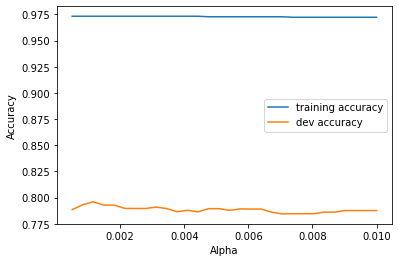

In [ ]:
X_train = TfidfVectorizer().fit_transform(train_data)
y_train = train_labels

training_accuracy = []
test_accuracy = []
dev_accuracy = []
alpha_settings = np.linspace(0.0005,0.01,30)
for set_alpha in alpha_settings:
 # build the model
    clf_mnb = MultinomialNB(alpha=set_alpha).fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(f1_score(clf_mnb.predict(X_train), y_train, average="weighted"))
 # record generalization accuracy
    #test_accuracy.append(f1_score(clf_mnb.predict(X_test), y_test, average="weighted"))
 # record dev accuracy
    dev_accuracy.append(f1_score(clf_mnb.predict(X_dev), y_dev, average="weighted"))   
plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, dev_accuracy, label="dev accuracy")
#plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.legend()

Again, we use alpha = 0.001

In [ ]:

X_train = CountVectorizer().fit_transform(train_data)
y_train = train_labels

clf_mnb = MultinomialNB(alpha=0.001).fit(X_train, y_train)
print("CountVectorizer training set score: {:.3f}".format(f1_score(clf_mnb.predict(X_train), 
                                                                   y_train, average="weighted")))
print("CountVectorizer test set score: {:.3f}".format(f1_score(clf_mnb.predict(X_test),
                                                               y_test, average="weighted")))

X_train = TfidfVectorizer().fit_transform(train_data)
y_train = train_labels

clf_mnb = MultinomialNB(alpha=0.001).fit(X_train, y_train)
print("TfdidfVectorizer training set score: {:.3f}".format(f1_score(clf_mnb.predict(X_train),
                                                                    y_train, average="weighted")))
print("TfdidfVectorizer test set score: {:.3f}".format(f1_score(clf_mnb.predict(X_test),
                                                                y_test, average="weighted")))


CountVectorizer training set score: 0.962
CountVectorizer test set score: 0.779
TfdidfVectorizer training set score: 0.973
TfdidfVectorizer test set score: 0.797


Using TfidfVectorizer improves the testing score of MultinomialNB by 0.08 compared to CountVectorizer.

In [ ]:
### END ###

# Model assessments
For this (large and sparse) dataset:
1) Multinomial Naive Bayes classifier offers the best testing performance of all models.\
2) Vectorization via TfidfVectorizer provides a boost on training performance compared on the unweighted CountVectorizer but gives us the issue of too much calibration. 



# Reference

Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".